In [29]:
import pandas as pd
file = pd.read_csv('../data/cleaned_complete.csv').drop(['Unnamed: 0','Unnamed: 0.1','index','dateUpdated','dateListed','geoLocation','geometry', 'index_right', 'SA2_maincode_2021','Population Increase','Earners (persons)','Median age of earners (years)','Male','Female',	'Person','Male Ratio','Female Ratio','Sum ($)','Mean ($)','Median ($)'],axis = 1)

In [39]:
postcode_count = pd.DataFrame(file['postcode'].value_counts()).reset_index().rename({"index":"postcode",'postcode':'count'},axis = 1)

In [40]:
postcode_count

,postcode,count
0,3000,8962
1,3008,4254
2,3006,3148
3,3029,2824
4,3141,2586
...,...,...
461,3903,1
462,3890,1
463,3453,1
464,3221,1


In [42]:
house = file.groupby(['bathrooms', 'bedrooms', 'carspaces','postcode','year','month'],as_index = False)['rent','Population ','postcode','bond', 'distance of the closest bus stop',
       'count of bus stop', 'distance of the closest train stop',
       'count of train stop', 'distance of the closest tram stop',
       'count of tram stop', 'distance of the closest vline stop',
       'count of vline stop', 'distance of the closest school',
       'count of school', 'count of hospital',
       'distance to the closest shopping mall', 'count of shopping mall',
       'bench', 'cafe', 'childcare', 'fast_food', 'kindergarten', 'parking',
       'restaurant', 'place_of_worship', 'school', 'university', 'garden',
       'park', 'playground', 'pitch', 'offence count', 'incidents recorded'].median('rent').rename({'surburb':'suburb','Population ':'population'},axis = 1)

/var/folders/rx/_11wjxvj4hx57z74nvgkbvpr0000gn/T/ipykernel_22408/858786182.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  house = file.groupby(['bathrooms', 'bedrooms', 'carspaces','postcode','year','month'],as_index = False)['rent','Population ','postcode','bond', 'distance of the closest bus stop',


In [43]:
house

,bathrooms,bedrooms,carspaces,year,month,rent,population,postcode,bond,distance of the closest bus stop,...,restaurant,place_of_worship,school,university,garden,park,playground,pitch,offence count,incidents recorded
0,0.0,1.0,0.0,2019,12,850.0,16375.000000,3008.0,5100.0,0.456268,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,25125.0,18185.0
1,0.0,1.0,0.0,2019,10,250.0,19243.000000,3015.0,1084.0,0.370457,...,24.0,14.0,19.0,0.0,10.0,67.0,26.0,40.0,10604.0,8777.0
2,0.0,1.0,0.0,2022,5,175.0,16701.220181,3053.0,0.0,0.449442,...,13.0,4.0,6.0,0.0,8.0,19.0,8.0,24.0,20238.0,15867.0
3,0.0,1.0,0.0,2022,3,300.0,12678.988491,3079.0,1304.0,0.516233,...,17.0,3.0,3.0,0.0,0.0,20.0,14.0,42.0,9248.0,7527.0
4,0.0,1.0,0.0,2020,2,460.0,23636.000000,3171.0,5000.0,0.642444,...,0.0,1.0,1.0,0.0,0.0,5.0,4.0,12.0,22113.0,16777.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45611,4.0,5.0,4.0,2021,11,540.0,22005.000000,3064.0,2340.0,0.386602,...,18.0,11.0,24.0,1.0,77.0,119.0,48.0,190.0,55237.0,41689.0
45612,4.0,5.0,4.0,2020,10,900.0,11324.000000,3133.0,NaN,0.642555,...,0.0,1.0,1.0,0.0,0.0,4.0,0.0,2.0,7751.0,5998.0
45613,4.0,5.0,4.0,2022,6,650.0,25309.447163,3335.0,2824.0,0.129284,...,11.0,1.0,4.0,0.0,140.0,48.0,30.0,56.0,4762.0,3843.0
45614,4.0,5.0,4.0,2019,8,570.0,16489.000000,3844.0,NaN,1.741227,...,0.0,0.0,0.0,0.0,0.0,4.0,3.0,3.0,42754.0,29717.0


In [44]:
house = house.set_index(['month','year'])

In [45]:
cpi_combined_df = pd.read_csv('../data/cpi_df.csv')
cpi_combined_df = cpi_combined_df.set_index(['month','year'])
cpi_combined_df 

,,Consumer_price_index
month,year,
8,2018,1.9
9,2018,1.9
10,2018,1.9
11,2018,1.8
12,2018,1.8
...,...,...
8,2024,3.5
9,2024,3.5
10,2024,3.0


In [53]:
#个数不同
merged_data = house.join(cpi_combined_df, on = ['month','year'],how = 'left').reset_index()
merged_data

,month,year,bathrooms,bedrooms,carspaces,rent,population,postcode,bond,distance of the closest bus stop,...,place_of_worship,school,university,garden,park,playground,pitch,offence count,incidents recorded,Consumer_price_index
0,12,2019,0.0,1.0,0.0,850.0,16375.000000,3008.0,5100.0,0.456268,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,25125.0,18185.0,1.8
1,10,2019,0.0,1.0,0.0,250.0,19243.000000,3015.0,1084.0,0.370457,...,14.0,19.0,0.0,10.0,67.0,26.0,40.0,10604.0,8777.0,1.7
2,5,2022,0.0,1.0,0.0,175.0,16701.220181,3053.0,0.0,0.449442,...,4.0,6.0,0.0,8.0,19.0,8.0,24.0,20238.0,15867.0,6.1
3,3,2022,0.0,1.0,0.0,300.0,12678.988491,3079.0,1304.0,0.516233,...,3.0,3.0,0.0,0.0,20.0,14.0,42.0,9248.0,7527.0,5.1
4,2,2020,0.0,1.0,0.0,460.0,23636.000000,3171.0,5000.0,0.642444,...,1.0,1.0,0.0,0.0,5.0,4.0,12.0,22113.0,16777.0,2.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46699,11,2021,4.0,5.0,4.0,540.0,22005.000000,3064.0,2340.0,0.386602,...,11.0,24.0,1.0,77.0,119.0,48.0,190.0,55237.0,41689.0,3.5
46700,10,2020,4.0,5.0,4.0,900.0,11324.000000,3133.0,NaN,0.642555,...,1.0,1.0,0.0,0.0,4.0,0.0,2.0,7751.0,5998.0,0.7
46701,6,2022,4.0,5.0,4.0,650.0,25309.447163,3335.0,2824.0,0.129284,...,1.0,4.0,0.0,140.0,48.0,30.0,56.0,4762.0,3843.0,6.1
46702,8,2019,4.0,5.0,4.0,570.0,16489.000000,3844.0,NaN,1.741227,...,0.0,0.0,0.0,0.0,4.0,3.0,3.0,42754.0,29717.0,1.7


In [54]:
merged_data = pd.merge(merged_data,postcode_count,left_on='postcode',right_on = 'postcode', how = 'left').rename({'count':'postcode_count'},axis = 1)
merged_data

,month,year,bathrooms,bedrooms,carspaces,rent,population,postcode,bond,distance of the closest bus stop,...,school,university,garden,park,playground,pitch,offence count,incidents recorded,Consumer_price_index,postcode_count
0,12,2019,0.0,1.0,0.0,850.0,16375.000000,3008.0,5100.0,0.456268,...,0.0,0.0,0.0,1.0,0.0,0.0,25125.0,18185.0,1.8,4254
1,10,2019,0.0,1.0,0.0,250.0,19243.000000,3015.0,1084.0,0.370457,...,19.0,0.0,10.0,67.0,26.0,40.0,10604.0,8777.0,1.7,296
2,5,2022,0.0,1.0,0.0,175.0,16701.220181,3053.0,0.0,0.449442,...,6.0,0.0,8.0,19.0,8.0,24.0,20238.0,15867.0,6.1,1335
3,3,2022,0.0,1.0,0.0,300.0,12678.988491,3079.0,1304.0,0.516233,...,3.0,0.0,0.0,20.0,14.0,42.0,9248.0,7527.0,5.1,277
4,2,2020,0.0,1.0,0.0,460.0,23636.000000,3171.0,5000.0,0.642444,...,1.0,0.0,0.0,5.0,4.0,12.0,22113.0,16777.0,2.2,170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46699,11,2021,4.0,5.0,4.0,540.0,22005.000000,3064.0,2340.0,0.386602,...,24.0,1.0,77.0,119.0,48.0,190.0,55237.0,41689.0,3.5,1482
46700,10,2020,4.0,5.0,4.0,900.0,11324.000000,3133.0,NaN,0.642555,...,1.0,0.0,0.0,4.0,0.0,2.0,7751.0,5998.0,0.7,234
46701,6,2022,4.0,5.0,4.0,650.0,25309.447163,3335.0,2824.0,0.129284,...,4.0,0.0,140.0,48.0,30.0,56.0,4762.0,3843.0,6.1,240
46702,8,2019,4.0,5.0,4.0,570.0,16489.000000,3844.0,NaN,1.741227,...,0.0,0.0,0.0,4.0,3.0,3.0,42754.0,29717.0,1.7,214


In [55]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error, accuracy_score
X = merged_data.drop('rent',axis=1)
y = merged_data['rent']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

In [57]:
xgbc = xgb.XGBRegressor(
    learning_rate=0.1,
    n_estimators=20,
    seed=27,
    verbosity=1
)

xgbc.fit(
    X_train, 
    y_train, 
    eval_set=[(X_train, y_train), (X_test, y_test)]
)
fea_imp = xgbc.feature_importances_
print(fea_imp)


[0]	validation_0-rmse:455.95213	validation_1-rmse:453.96055
[1]	validation_0-rmse:412.32658	validation_1-rmse:410.47334
[2]	validation_0-rmse:373.19970	validation_1-rmse:371.46817
[3]	validation_0-rmse:338.12763	validation_1-rmse:336.49522
[4]	validation_0-rmse:306.75979	validation_1-rmse:305.19618
[5]	validation_0-rmse:278.67668	validation_1-rmse:277.18238
[6]	validation_0-rmse:253.54371	validation_1-rmse:252.13286
[7]	validation_0-rmse:231.05872	validation_1-rmse:229.79678
[8]	validation_0-rmse:211.12140	validation_1-rmse:210.03500
[9]	validation_0-rmse:193.42998	validation_1-rmse:192.45975
[10]	validation_0-rmse:177.69626	validation_1-rmse:176.89042
[11]	validation_0-rmse:163.58849	validation_1-rmse:162.99409
[12]	validation_0-rmse:151.29516	validation_1-rmse:150.87678
[13]	validation_0-rmse:140.34101	validation_1-rmse:140.13553
[14]	validation_0-rmse:130.84207	validation_1-rmse:130.78193
[15]	validation_0-rmse:122.27972	validation_1-rmse:122.40996
[16]	validation_0-rmse:114.77176	v

<Axes:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

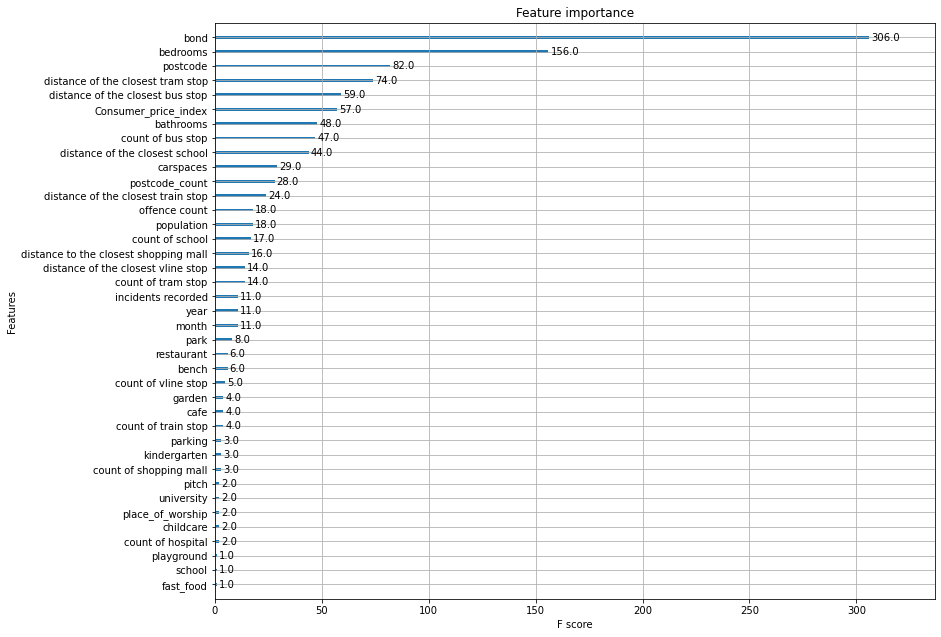

In [58]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 8))
ax = fig.add_axes([0,0,1,1])
xgb.plot_importance(xgbc, ax)